In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("final_stemmed_dataset.xlsx")

In [3]:
df.head()   

,Unnamed: 0,review_description,rating,company,cleaned_review_description,stemmed_review_description
0,0,سيئ جدا بعد الإصدار الجديد,-1,alahli_bank,سيئ الاصدار الجديد,سيئ اصدار جديد
1,1,ابلكيشن زباله بجد,-1,alahli_bank,ابلكيشن زباله بجد,ابلكيشن زبال جد
2,2,سيئ التطبيق لايعمل,-1,alahli_bank,سيئ التطبيق لايعمل,سيئ تطبيق ايعمل
3,3,للأسف التطبيق للأسوأ كان جدا رائع وسهل وبسيط ا...,-1,alahli_bank,للاسف التطبيق للاسوا رائع وسهل وبسيط معقد يفتح...,اسف تطبيق اسو رائع سهل سيط معقد فتح مع سهول جد...
4,4,التحديث بطيئ جدا جدا عند الفتح,-1,alahli_bank,التحديث بطيئ الفتح,تحديث طيئ فتح


In [4]:
df.dropna(inplace=True)

In [5]:
X = df['stemmed_review_description']
y = df["rating"]

# Train the model for sentiment analysis

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
X = df['stemmed_review_description']
y = df["rating"]
# Split your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [7]:
df.isna().sum()

Unnamed: 0                    0
review_description            0
rating                        0
company                       0
cleaned_review_description    0
stemmed_review_description    0
dtype: int64

In [8]:
#Fit TF-IDF only on the training set
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

#Transform the test set using the same vectorizer
X_test_tfidf = vectorizer.transform(X_test)

## LogisticRegression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train the classifier
model = LogisticRegression(multi_class="multinomial")
model.fit(X_train_tfidf, y_train)




c:\Users\abdul\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

Accuracy: 0.8730110851368675
Classification Report:
               precision    recall  f1-score   support

          -1       0.87      0.90      0.88      4723
           0       0.92      0.85      0.88      4760
           1       0.82      0.87      0.85      3778

    accuracy                           0.87     13261
   macro avg       0.87      0.87      0.87     13261
weighted avg       0.88      0.87      0.87     13261



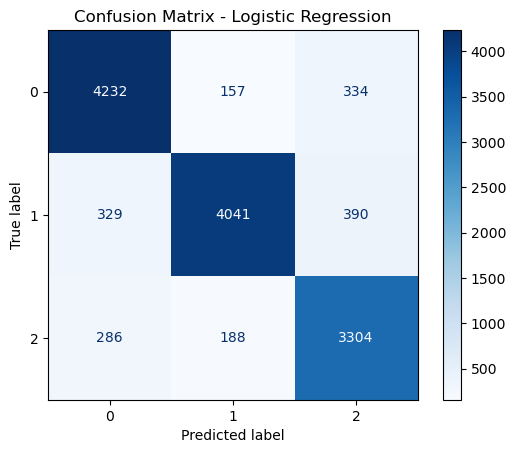

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [13]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


# Create the pipeline: TF-IDF + Logistic Regression
pipeline = make_pipeline(
    TfidfVectorizer(),
    LogisticRegression(multi_class="multinomial")
)




### Cross-Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))  


#OUTPUT:
""" 
Cross-Validation Accuracy Scores: [0.87308649 0.87323731 0.8731619  0.87127668 0.87330317]
Mean Accuracy: 0.8728131106729119
Standard Deviation: 0.00077163841634839
"""

c:\Users\abdul\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\abdul\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross-Validation Accuracy Scores: [0.87308649 0.87323731 0.8731619  0.87127668 0.87330317]
Mean Accuracy: 0.8728131106729119
Standard Deviation: 0.00077163841634839


c:\Users\abdul\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forset

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=75, random_state=42, )
# Train the model
rf_model.fit(X_train_tfidf, y_train)



RandomForestClassifier(n_estimators=75, random_state=42)

Random Forest Accuracy: 0.8564964934771133
Classification Report:
               precision    recall  f1-score   support

          -1       0.85      0.89      0.87      4723
           0       0.94      0.82      0.88      4760
           1       0.78      0.86      0.82      3778

    accuracy                           0.86     13261
   macro avg       0.86      0.86      0.85     13261
weighted avg       0.86      0.86      0.86     13261



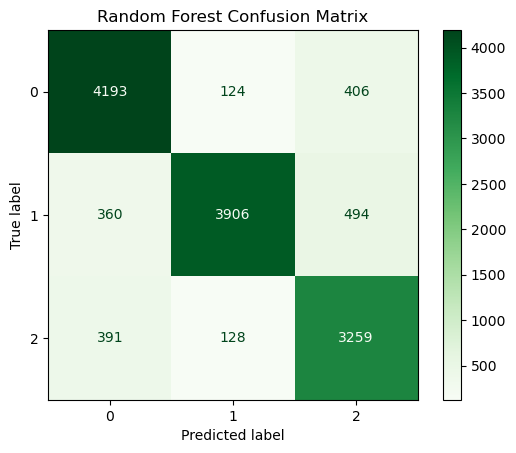

In [16]:

# Predict on test data
y_pred = rf_model.predict(X_test_tfidf)

# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()

# XGBClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

''''

n_estimators	عدد الأشجار (عدد التكرارات boosting). الافتراضي 100
max_depth	عمق كل شجرة. كلما زاد، زادت التعقيد
learning_rate	معدل التعلم (مدى تصحيح كل شجرة). كلما قل، زادت الدقة ولكن بطء التدريب
subsample	نسبة البيانات المستخدمة لكل شجرة (لتقليل overfitting)
colsample_bytree	نسبة الأعمدة المستخدمة في كل شجرة
gamma	الحد الأدنى للتحسين المطلوب لتقسيم node

'''

model = XGBClassifier(
    n_estimators=150,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    random_state=42 

)
# we need to encode the labels the labels insted of [-1, 0, 1] to [0, 1, 2] 
# in order to use it with xgboost
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


In [ ]:
model.fit(X_train_tfidf, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

XGBClassifier Accuracy: 0.8117789005354046
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.93      0.81      4723
           1       0.96      0.76      0.85      4760
           2       0.83      0.73      0.78      3778

    accuracy                           0.81     13261
   macro avg       0.83      0.81      0.81     13261
weighted avg       0.83      0.81      0.81     13261



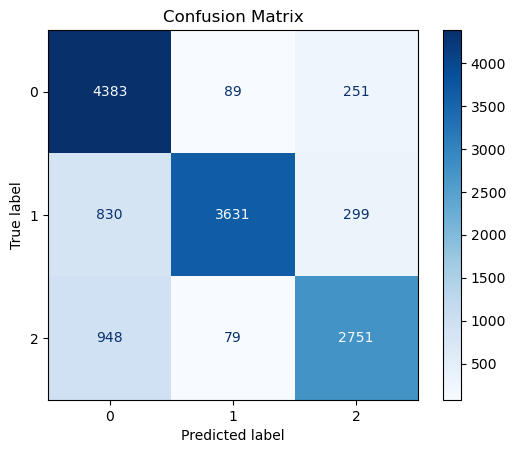

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


y_pred = model.predict(X_test_tfidf)

print("XGBClassifier Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("Classification Report:\n", classification_report(y_test_encoded, y_pred))

cm = confusion_matrix(y_test_encoded, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  
plt.title("Confusion Matrix")
plt.show()


[W 2025-04-10 19:42:39,200] Trial 0 failed with parameters: {'n_estimators': 99, 'max_depth': 10, 'learning_rate': 0.05987965615547484} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\abdul\anaconda3\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\abdul\AppData\Local\Temp\ipykernel_3136\2371612773.py", line 10, in objective
    score = cross_val_score(model, X_train_tfidf, y_train_encoded, cv=3, scoring='accuracy').mean()
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\abdul\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 562, in cross_val_score
    cv_results = cross_validate(
                 ^^^^^^^^^^^^^^^
  File "c:\Users\abdul\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args

KeyboardInterrupt: 